<a href="https://colab.research.google.com/github/sini-sam-20/Take-Home-Assignment/blob/main/HubSpot/HubSpot_Integrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import Packages

In [104]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import numpy as np
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression

pd.set_option('display.width', 1000)

# 2. Load Datasets

In [105]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [106]:
customer_metadata = pd.read_csv('customer_metadata.csv')
customer_integrations = pd.read_csv('customer_integrations.csv')

In [107]:
# Display the first few rows of each dataset and their shape
print("Customer Metadata:")
print(customer_metadata.head())
print(customer_metadata.shape)

print("\nCustomer Integrations:")
print(customer_integrations.head())
print(customer_integrations.shape)

Customer Metadata:
  CUSTOMER_ID SNAPSHOT_MONTH MARKETING_HUB_TIER  MARKETING_HUB_MRR  MARKETING_HUB_MRR_CANCELED SALES_HUB_TIER  SALES_HUB_MRR  SALES_HUB_MRR_CANCELED
0   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN
1   C00020863        2024-01            STarter              14.16                         NaN        Starter         -17.55                     NaN
2   C00020864        2024-01            STarter               9.49                         NaN            NaN            NaN                     NaN
3   C00020865        2024-01                Pro             361.07                         NaN            NaN            NaN                     NaN
4   C00020866        2024-01                Pro             295.94                         NaN            NaN            NaN                     NaN
(250762, 8)

Customer Integrations:
  CUSTOMER_ID SNAPSHOT_MONTH     INTEGRATION
0   C0

# 3. Data Processing

## **3.1 Dataset Exploration**

**1. Basic info about the datasets including non-null count and the datatypes**

---







In [108]:
print("Customer Metadata Info:")
print(customer_metadata.info())

print("\nCustomer Integrations Info:")
print(customer_integrations.info())

Customer Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250762 entries, 0 to 250761
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CUSTOMER_ID                 250762 non-null  object 
 1   SNAPSHOT_MONTH              250762 non-null  object 
 2   MARKETING_HUB_TIER          240675 non-null  object 
 3   MARKETING_HUB_MRR           240675 non-null  float64
 4   MARKETING_HUB_MRR_CANCELED  15543 non-null   float64
 5   SALES_HUB_TIER              70325 non-null   object 
 6   SALES_HUB_MRR               70325 non-null   float64
 7   SALES_HUB_MRR_CANCELED      4335 non-null    float64
dtypes: float64(4), object(4)
memory usage: 15.3+ MB
None

Customer Integrations Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839016 entries, 0 to 839015
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 


**2. Checking for missing values**

---



In [109]:
print("\nMissing Values in Customer Metadata:")
print(customer_metadata.isnull().sum())

print("\nMissing Values in Customer Integrations:")
print(customer_integrations.isnull().sum())


Missing Values in Customer Metadata:
CUSTOMER_ID                        0
SNAPSHOT_MONTH                     0
MARKETING_HUB_TIER             10087
MARKETING_HUB_MRR              10087
MARKETING_HUB_MRR_CANCELED    235219
SALES_HUB_TIER                180437
SALES_HUB_MRR                 180437
SALES_HUB_MRR_CANCELED        246427
dtype: int64

Missing Values in Customer Integrations:
CUSTOMER_ID       0
SNAPSHOT_MONTH    0
INTEGRATION       0
dtype: int64


**3. Merging the datasets, keeping all rows from the customer_metadata and matching records from customer_integrations**

---



In [110]:
metadata_integration_data = pd.merge(
    customer_metadata,
    customer_integrations,
    on=['CUSTOMER_ID', 'SNAPSHOT_MONTH'],
    how='left' )


print("\nMerged Data:")
print(metadata_integration_data.head())
print(metadata_integration_data.shape)


Merged Data:
  CUSTOMER_ID SNAPSHOT_MONTH MARKETING_HUB_TIER  MARKETING_HUB_MRR  MARKETING_HUB_MRR_CANCELED SALES_HUB_TIER  SALES_HUB_MRR  SALES_HUB_MRR_CANCELED     INTEGRATION
0   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN  GoogleCalendar
1   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN     FacebookAds
2   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN       GoogleAds
3   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN        Calendly
4   C00020862        2024-01                Ent             840.22                         NaN     Enterprise         -17.55                     NaN        Typef

## **3.2 Data Standardizing**

**1. Standardizing the data to TitleCase and Renaming column names to unsure consistency**

---




In [111]:
categorical_columns = ['MARKETING_HUB_TIER', 'SALES_HUB_TIER', 'INTEGRATION']

In [112]:
for col in categorical_columns:
    metadata_integration_data[col] = metadata_integration_data[col].str.strip().str.title()

In [113]:
data_mapping = {
    'Googleads': 'Google Ads',
    'Googlecalendar': 'Google Calendar',
    'Facebookads': 'Facebook Ads',
    'Lin': 'LinkedIn',
    'Ent': 'Enterprise',
    'Pro': 'Professional'
}

In [114]:
for col in categorical_columns:
    metadata_integration_data[col] = metadata_integration_data[col].replace(data_mapping)
    print(f"Distinct values in '{col}': {metadata_integration_data[col].unique()}")

Distinct values in 'MARKETING_HUB_TIER': ['Enterprise' 'Starter' 'Professional' nan]
Distinct values in 'SALES_HUB_TIER': ['Enterprise' 'Starter' nan 'Professional']
Distinct values in 'INTEGRATION': ['Google Calendar' 'Facebook Ads' 'Google Ads' 'Calendly' 'Typeform'
 'Eventbrite' 'Gmail' 'Mailchimp' 'Instagram' 'Linkedin' 'Canva' nan
 'Zapier']


## **3.3 Handling Missing Data**

**1. Replacing missing values for Categorical Fields - 'MARKETING_HUB_TIER', 'SALES_HUB_TIER', 'INTEGRATION'**

---



In [115]:
for col in categorical_columns:
    metadata_integration_data[col] = metadata_integration_data[col].fillna('No Data')

**2. Dropping duplicate records**

---



In [116]:
metadata_integration_data = metadata_integration_data.drop_duplicates()

In [117]:
metadata_integration_data.isnull().sum()

,0
CUSTOMER_ID,0
SNAPSHOT_MONTH,0
MARKETING_HUB_TIER,0
MARKETING_HUB_MRR,32027
MARKETING_HUB_MRR_CANCELED,800326
SALES_HUB_TIER,0
SALES_HUB_MRR,606975
SALES_HUB_MRR_CANCELED,833529
INTEGRATION,0


In [118]:
metadata_integration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846900 entries, 0 to 846899
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CUSTOMER_ID                 846900 non-null  object 
 1   SNAPSHOT_MONTH              846900 non-null  object 
 2   MARKETING_HUB_TIER          846900 non-null  object 
 3   MARKETING_HUB_MRR           814873 non-null  float64
 4   MARKETING_HUB_MRR_CANCELED  46574 non-null   float64
 5   SALES_HUB_TIER              846900 non-null  object 
 6   SALES_HUB_MRR               239925 non-null  float64
 7   SALES_HUB_MRR_CANCELED      13371 non-null   float64
 8   INTEGRATION                 846900 non-null  object 
dtypes: float64(4), object(5)
memory usage: 58.2+ MB


# 4. Descriptive Analysis

**Count of unique values in the Hub Tiers and Integration**

---



In [119]:
metadata_integration_data_filtered = metadata_integration_data[metadata_integration_data['INTEGRATION'] != 'No Data']

for col in categorical_columns:
    print(f"\nUnique values in {col}: {metadata_integration_data[col].nunique()-1}")
    print(f"Distinct values in '{col}': {metadata_integration_data[col].unique()}")


Unique values in MARKETING_HUB_TIER: 3
Distinct values in 'MARKETING_HUB_TIER': ['Enterprise' 'Starter' 'Professional' 'No Data']

Unique values in SALES_HUB_TIER: 3
Distinct values in 'SALES_HUB_TIER': ['Enterprise' 'Starter' 'No Data' 'Professional']

Unique values in INTEGRATION: 12
Distinct values in 'INTEGRATION': ['Google Calendar' 'Facebook Ads' 'Google Ads' 'Calendly' 'Typeform'
 'Eventbrite' 'Gmail' 'Mailchimp' 'Instagram' 'Linkedin' 'Canva' 'No Data'
 'Zapier']


## **4.1 Customer Analysis**

**1. Count Unique Customers - Integration**

---



In [120]:
# With Integrations (Filtered out by 'No Data')

customers_with_integrations = metadata_integration_data[metadata_integration_data['INTEGRATION'] != 'No Data']
count_customers_with_integrations = customers_with_integrations['CUSTOMER_ID'].nunique()
customers_overall = metadata_integration_data['CUSTOMER_ID'].nunique()

count_customers_without_integrations = customers_overall - count_customers_with_integrations

print(f"Total Unique Users: {customers_overall}")
print(f"Users with integrations: {count_customers_with_integrations}")
print(f"Users without integrations: {count_customers_without_integrations}")

Total Unique Users: 54797
Users with integrations: 53567
Users without integrations: 1230


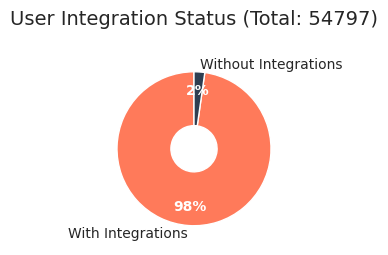

In [121]:
labels = ['With Integrations', 'Without Integrations']
sizes = [count_customers_with_integrations, count_customers_without_integrations]
colors = ['#ff7a5aff', '#2e3e51ff']

fig, ax = plt.subplots(figsize=(2.5, 2.5))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90,
    wedgeprops=dict(width=0.7), pctdistance=0.75, textprops={'fontsize': 10}
)

# Set percentage text color to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
ax.set_title(f"User Integration Status (Total: {customers_overall})", fontsize=14, pad=20)

plt.show()

**2. Count of Customers using Integration**


---



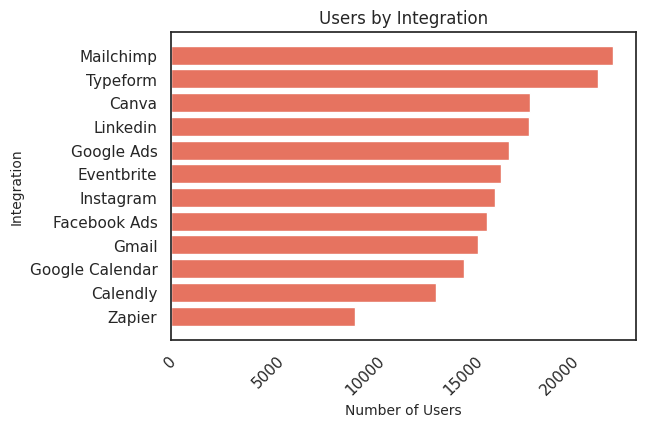

In [122]:
integration_customer_counts = metadata_integration_data_filtered.groupby('INTEGRATION')['CUSTOMER_ID'].nunique().reset_index()

plt.figure(figsize=(6, 4))

# Creating bar plot
integration_customer_counts_sorted = integration_customer_counts.sort_values(by='CUSTOMER_ID')
plt.barh(integration_customer_counts_sorted['INTEGRATION'], integration_customer_counts_sorted['CUSTOMER_ID'], color='#e67360ff')

plt.title('Users by Integration')
plt.ylabel('Integration', fontsize=10)
plt.xlabel('Number of Users', fontsize=10)
plt.xticks(rotation=45)
plt.show()

**3. Distribution of Users by Integration**


---



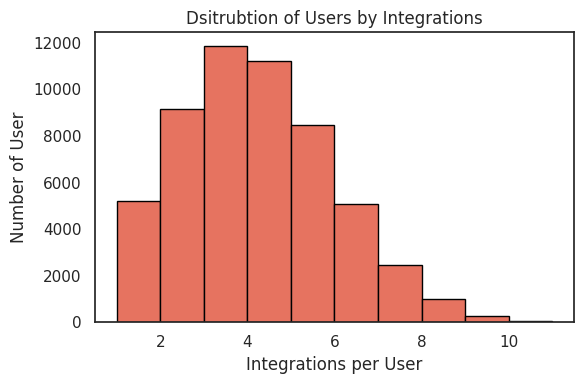

In [123]:
customer_integration_counts = metadata_integration_data.groupby('CUSTOMER_ID')['INTEGRATION'].nunique()

plt.figure(figsize=(6, 4))
plt.hist(customer_integration_counts, bins=range(customer_integration_counts.min(), customer_integration_counts.max() + 1),
         color='#e67360ff', edgecolor='black')

# Add titles and labels
plt.title('Dsitrubtion of Users by Integrations')
plt.xlabel('Integrations per User')
plt.ylabel('Number of User')

plt.tight_layout()
plt.show()

**4. Customers - Product Hub Distribution**


---




In [124]:
# Filtering by customers where Hub Tier and Integration are not 'No Data'
marketing_customers = metadata_integration_data_filtered[
    (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data') &
    (metadata_integration_data_filtered['SALES_HUB_TIER'] == 'No Data')
]
sales_customers = metadata_integration_data_filtered[
    (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data') &
    (metadata_integration_data_filtered['MARKETING_HUB_TIER'] == 'No Data')
]

marketing_sales_customers = metadata_integration_data_filtered[
    (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data') &
    (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data')
]

marketing_customers = marketing_customers['CUSTOMER_ID'].nunique()
sales_customers = sales_customers['CUSTOMER_ID'].nunique()
marketing_sales_customers = marketing_sales_customers['CUSTOMER_ID'].nunique()

print(f"Marketing Users: {marketing_customers}")
print(f"\nSales Users: {sales_customers}")
print(f"\nBoth Marketing & Sales Users: {marketing_sales_customers}")


Marketing Users: 43712

Sales Users: 3249

Both Marketing & Sales Users: 16537


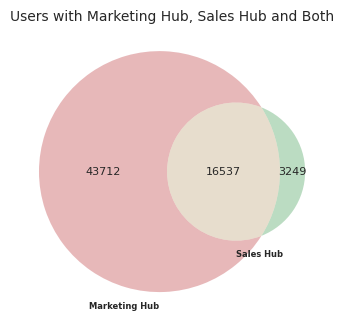

In [125]:
# Venn diagram for Marketing, Sales, and Both
fig, ax = plt.subplots(figsize=(4, 6))
venn = venn2(subsets=(marketing_customers,sales_customers,
                      marketing_sales_customers
                     ),
             set_labels=('Marketing Hub', 'Sales Hub', 'Both'),
             ax=ax)

for label in venn.set_labels:
    label.set_fontsize(6)
    label.set_fontweight('bold')

for label in venn.subset_labels:
    label.set_fontsize(8)

ax.set_title("Users with Marketing Hub, Sales Hub and Both", fontsize=10)
plt.show()

In [126]:
# Creating 'Product' to categories users by Marketing, Sales, and both Marketing & Sales

grouping_conditions = [
    (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data') &
    (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data'),  # Marketing & Sales
    (metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data'),  # Marketing
    (metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data')  # Sales
]

product_categories = ['Marketing & Sales', 'Marketing', 'Sales']

metadata_integration_data_filtered.loc[:, 'PRODUCT'] = np.select(grouping_conditions, product_categories, default='No Data')

product_customer_counts = metadata_integration_data_filtered.groupby('PRODUCT')['CUSTOMER_ID'].nunique()
print(product_customer_counts)

<ipython-input-126-b64b067e9969>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_integration_data_filtered.loc[:, 'PRODUCT'] = np.select(grouping_conditions, product_categories, default='No Data')


PRODUCT
Marketing            43712
Marketing & Sales    16537
Sales                 3249
Name: CUSTOMER_ID, dtype: int64


## **4.2 MRR Analysis**

**1. Descriptive Statistics of MRR and Cancellation**


---



In [127]:
print("Descriptive Statistics:")
print(metadata_integration_data_filtered.describe().T)

Descriptive Statistics:
                               count        mean         std    min    25%      50%      75%      max
MARKETING_HUB_MRR           807329.0  320.993354  370.214140   1.00  15.52  293.610   396.57  3345.21
MARKETING_HUB_MRR_CANCELED   45968.0  249.896803  326.431546   1.00  11.34   74.795   362.44  2612.12
SALES_HUB_MRR               237767.0  529.818358  598.229907 -17.55  14.53  283.470  1057.75  3051.00
SALES_HUB_MRR_CANCELED       13192.0  442.072266  555.744725   1.00  10.76  243.250   738.81  2587.58


In [128]:
monthly_marketing_mrr = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')['MARKETING_HUB_MRR'].sum().reset_index()
monthly_sales_mrr = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')['SALES_HUB_MRR'].sum().reset_index()
print(monthly_marketing_mrr)
print(monthly_sales_mrr)

  SNAPSHOT_MONTH  MARKETING_HUB_MRR
0        2024-01        35175423.58
1        2024-02        38162461.04
2        2024-03        41121378.54
3        2024-04        44706812.53
4        2024-05        48142307.69
5        2024-06        51838860.03
  SNAPSHOT_MONTH  SALES_HUB_MRR
0        2024-01    14821858.93
1        2024-02    16973995.54
2        2024-03    19463570.15
3        2024-04    22097543.29
4        2024-05    24728945.79
5        2024-06    27887407.84


**2.Monthly MRR Trend**


---



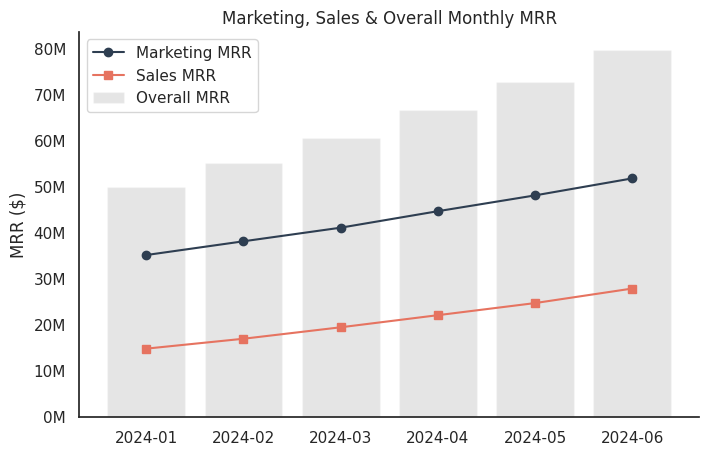

In [129]:
monthly_mrr = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR', 'SALES_HUB_MRR']].sum().reset_index()
monthly_mrr['OVERALL_MRR'] = monthly_mrr['MARKETING_HUB_MRR'] + monthly_mrr['SALES_HUB_MRR']

plt.figure(figsize=(8, 5))

# Line plots for Marketing and Sales MRR
plt.plot(monthly_mrr['SNAPSHOT_MONTH'], monthly_mrr['MARKETING_HUB_MRR'], marker='o', linestyle='-', color='#2e3e51ff', label='Marketing MRR')
plt.plot(monthly_mrr['SNAPSHOT_MONTH'], monthly_mrr['SALES_HUB_MRR'], marker='s', linestyle='-', color='#e67360ff', label='Sales MRR')

plt.bar(monthly_mrr['SNAPSHOT_MONTH'], monthly_mrr['OVERALL_MRR'], color='darkgray', alpha=0.3, label='Overall MRR')

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))


plt.ylabel('MRR ($)', fontsize=12)
plt.title("Marketing, Sales & Overall Monthly MRR", fontsize=12)

plt.legend()

sns.despine()
plt.show()

**3. MRR MoM Growth**


---



In [130]:
monthly_mrr = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR', 'SALES_HUB_MRR']].sum().reset_index()

monthly_mrr['Marketing_Hub_MRR_Growth'] = monthly_mrr['MARKETING_HUB_MRR'].pct_change() * 100
monthly_mrr['Sales_Hub_MRR_Growth'] = monthly_mrr['SALES_HUB_MRR'].pct_change() * 100

# For % formatting
monthly_mrr['Marketing_Hub_MRR_Growth'] = monthly_mrr['Marketing_Hub_MRR_Growth'].apply(lambda x: f"{x:.1f}%" if pd.notna(x) else "-")
monthly_mrr['Sales_Hub_MRR_Growth'] = monthly_mrr['Sales_Hub_MRR_Growth'].apply(lambda x: f"{x:.1f}%" if pd.notna(x) else "-")

print(monthly_mrr[['SNAPSHOT_MONTH', 'Marketing_Hub_MRR_Growth', 'Sales_Hub_MRR_Growth']])


  SNAPSHOT_MONTH Marketing_Hub_MRR_Growth Sales_Hub_MRR_Growth
0        2024-01                        -                    -
1        2024-02                     8.5%                14.5%
2        2024-03                     7.8%                14.7%
3        2024-04                     8.7%                13.5%
4        2024-05                     7.7%                11.9%
5        2024-06                     7.7%                12.8%


## **4.3 Cancellation Analysis**

**1.Monthly Cancellation Trend**


---



In [131]:
monthly_marketing_mrr_canceled = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')['MARKETING_HUB_MRR_CANCELED'].sum().reset_index()
monthly_sales_mrr_canceled = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')['SALES_HUB_MRR_CANCELED'].sum().reset_index()
print(monthly_marketing_mrr_canceled)
print(monthly_sales_mrr_canceled)

  SNAPSHOT_MONTH  MARKETING_HUB_MRR_CANCELED
0        2024-01                  1702670.20
1        2024-02                  1645399.03
2        2024-03                  1854657.95
3        2024-04                  1992632.69
4        2024-05                  2138137.13
5        2024-06                  2153759.25
  SNAPSHOT_MONTH  SALES_HUB_MRR_CANCELED
0        2024-01               858134.64
1        2024-02               794017.03
2        2024-03               830212.55
3        2024-04               977964.50
4        2024-05              1073117.15
5        2024-06              1298371.46


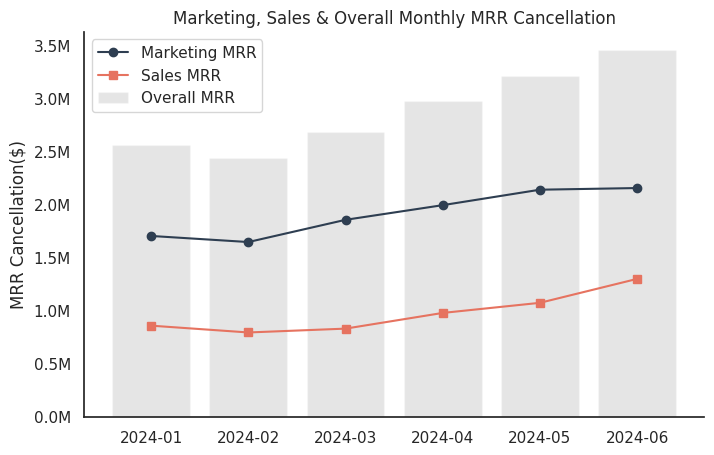

In [132]:
monthly_mrr = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR_CANCELED', 'SALES_HUB_MRR_CANCELED']].sum().reset_index()
monthly_mrr['OVERALL_MRR_CANCELED'] = monthly_mrr['MARKETING_HUB_MRR_CANCELED'] + monthly_mrr['SALES_HUB_MRR_CANCELED']

plt.figure(figsize=(8, 5))

# Line plots for Marketing and Sales MRR
plt.plot(monthly_mrr['SNAPSHOT_MONTH'], monthly_mrr['MARKETING_HUB_MRR_CANCELED'], marker='o', linestyle='-', color='#2e3e51ff', label='Marketing MRR')
plt.plot(monthly_mrr['SNAPSHOT_MONTH'], monthly_mrr['SALES_HUB_MRR_CANCELED'], marker='s', linestyle='-', color='#e67360ff', label='Sales MRR')

plt.bar(monthly_mrr['SNAPSHOT_MONTH'], monthly_mrr['OVERALL_MRR_CANCELED'], color='darkgray', alpha=0.3, label='Overall MRR')

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:0.1f}M'))
plt.ylim(0)

plt.ylabel('MRR Cancellation($)', fontsize=12)
plt.title("Marketing, Sales & Overall Monthly MRR Cancellation", fontsize=12)

plt.legend()

sns.despine()
plt.show()


**2. MoM Cancellation Change**

---



In [133]:
monthly_mrr = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR_CANCELED', 'SALES_HUB_MRR_CANCELED']].sum().reset_index()

monthly_mrr['Marketing_Hub_Cancellation_Growth'] = monthly_mrr['MARKETING_HUB_MRR_CANCELED'].pct_change() * 100
monthly_mrr['Sales_Hub_Cancellation_Growth'] = monthly_mrr['SALES_HUB_MRR_CANCELED'].pct_change() * 100

# For % formatting
monthly_mrr['Marketing_Hub_Cancellation_Growth'] = monthly_mrr['Marketing_Hub_Cancellation_Growth'].apply(lambda x: f"{x:.1f}%" if pd.notna(x) else "-")
monthly_mrr['Sales_Hub_Cancellation_Growth'] = monthly_mrr['Sales_Hub_Cancellation_Growth'].apply(lambda x: f"{x:.1f}%" if pd.notna(x) else "-")

print(monthly_mrr[['SNAPSHOT_MONTH', 'Marketing_Hub_Cancellation_Growth', 'Sales_Hub_Cancellation_Growth']])


  SNAPSHOT_MONTH Marketing_Hub_Cancellation_Growth Sales_Hub_Cancellation_Growth
0        2024-01                                 -                             -
1        2024-02                             -3.4%                         -7.5%
2        2024-03                             12.7%                          4.6%
3        2024-04                              7.4%                         17.8%
4        2024-05                              7.3%                          9.7%
5        2024-06                              0.7%                         21.0%


**3. Cancellation Rates**

---



In [134]:
marketing_cancellation_rate = metadata_integration_data_filtered['MARKETING_HUB_MRR_CANCELED'].sum() / metadata_integration_data_filtered['MARKETING_HUB_MRR'].sum()
print(f"Marketing Hub Cancellation Rate: {marketing_cancellation_rate:.2%}")

sales_cancellation_rate = metadata_integration_data_filtered['SALES_HUB_MRR_CANCELED'].sum() / metadata_integration_data_filtered['SALES_HUB_MRR'].sum()
print(f"Sales Hub Cancellation Rate: {sales_cancellation_rate:.2%}")

overall_cancellation_rate = (metadata_integration_data_filtered['MARKETING_HUB_MRR_CANCELED'].sum() + metadata_integration_data_filtered['SALES_HUB_MRR_CANCELED'].sum()) / (metadata_integration_data_filtered['MARKETING_HUB_MRR'].sum() + metadata_integration_data_filtered['SALES_HUB_MRR'].sum())

print(f"Overall Hub Cancellation Rate: {overall_cancellation_rate:.2%}")


Marketing Hub Cancellation Rate: 4.43%
Sales Hub Cancellation Rate: 4.63%
Overall Hub Cancellation Rate: 4.50%


**4. Monthly Cancellation Rate**


---



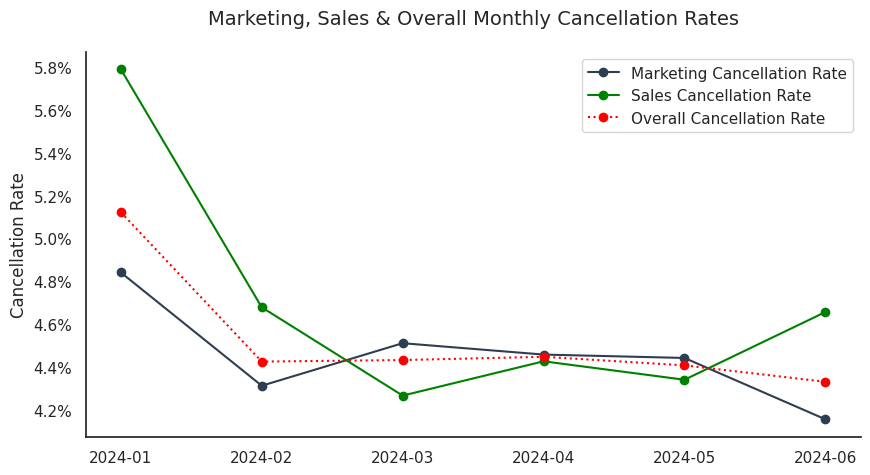

In [135]:

monthly_data = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR', 'SALES_HUB_MRR',
                                                                            'MARKETING_HUB_MRR_CANCELED', 'SALES_HUB_MRR_CANCELED']].sum().reset_index()

monthly_data['Marketing_Cancellation_Rate'] = monthly_data['MARKETING_HUB_MRR_CANCELED'] / monthly_data['MARKETING_HUB_MRR']
monthly_data['Sales_Cancellation_Rate'] = monthly_data['SALES_HUB_MRR_CANCELED'] / monthly_data['SALES_HUB_MRR']

monthly_data['Overall_Cancellation_Rate'] = (monthly_data['MARKETING_HUB_MRR_CANCELED'] + monthly_data['SALES_HUB_MRR_CANCELED']) / (monthly_data['MARKETING_HUB_MRR'] + monthly_data['SALES_HUB_MRR'])

fig, ax1 = plt.subplots(figsize=(10, 5))


ax1.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Marketing_Cancellation_Rate'], marker='o', linestyle='-', color='#2e3e51ff', label='Marketing Cancellation Rate')
ax1.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Sales_Cancellation_Rate'], marker='o', linestyle='-', color='green', label='Sales Cancellation Rate')
ax1.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Overall_Cancellation_Rate'], marker='o', linestyle=':', color='red', label='Overall Cancellation Rate')

ax1.set_ylabel('Cancellation Rate', fontsize=12)
ax1.set_title("Marketing, Sales & Overall Monthly Cancellation Rates", fontsize=14, pad=20)

def percent_formatter(x, pos):
    return f'{x*100:.1f}%'

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))

ax1.legend(loc='upper right')

sns.despine()
plt.show()



## **4.4 Retention Analysis**

**1.Customer Overall Retention (extrapolating it over 12 months)**

---



In [136]:
marketing_starting_value = metadata_integration_data_filtered['MARKETING_HUB_MRR'].sum()
marketing_lost_value = metadata_integration_data_filtered['MARKETING_HUB_MRR_CANCELED'].sum()
marketing_customer_dollar_retention = (1 - (marketing_lost_value / marketing_starting_value)) ** 12
print(f"Marketing Hub - Customer Retention: {marketing_customer_dollar_retention:.2%}")

sales_starting_value = metadata_integration_data_filtered['SALES_HUB_MRR'].sum()
sales_lost_value = metadata_integration_data_filtered['SALES_HUB_MRR_CANCELED'].sum()
sales_customer_dollar_retention = (1 - (sales_lost_value / sales_starting_value)) ** 12
print(f"Sales Hub - Customer Retention: {sales_customer_dollar_retention:.2%}")

overall_starting_value = metadata_integration_data_filtered['SALES_HUB_MRR'].sum() + metadata_integration_data_filtered['MARKETING_HUB_MRR'].sum()
overall_lost_value = metadata_integration_data_filtered['SALES_HUB_MRR_CANCELED'].sum() + metadata_integration_data_filtered['MARKETING_HUB_MRR_CANCELED'].sum()
overall_customer_dollar_retention = (1 - (overall_lost_value / overall_starting_value)) ** 12
print(f"Overall Hub - Customer Retention: {overall_customer_dollar_retention:.2%}")


Marketing Hub - Customer Retention: 58.04%
Sales Hub - Customer Retention: 56.62%
Overall Hub - Customer Retention: 57.57%


**2.Retention Monthly Trend**

---



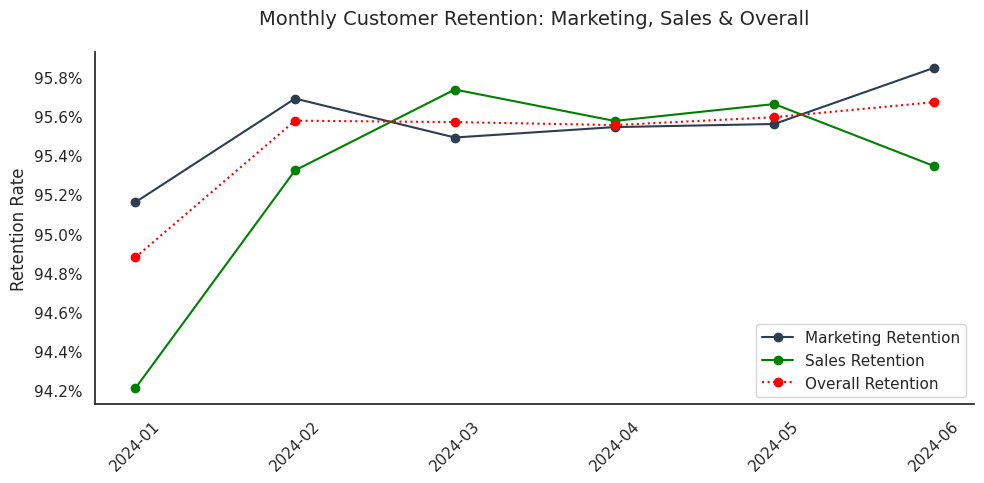

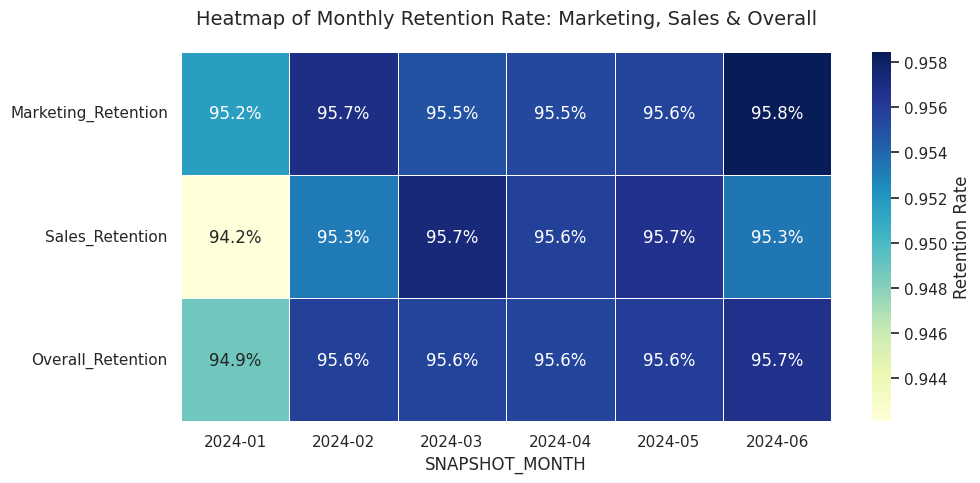

In [137]:
monthly_data = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR', 'SALES_HUB_MRR',
                                                                            'MARKETING_HUB_MRR_CANCELED', 'SALES_HUB_MRR_CANCELED']].sum().reset_index()
# Calculate Retention Rates for each month
monthly_data['Marketing_Retention'] = 1 - (monthly_data['MARKETING_HUB_MRR_CANCELED'] / monthly_data['MARKETING_HUB_MRR'])
monthly_data['Sales_Retention'] = 1 - (monthly_data['SALES_HUB_MRR_CANCELED'] / monthly_data['SALES_HUB_MRR'])

monthly_data['Overall_Retention'] = (1 - ((monthly_data['MARKETING_HUB_MRR_CANCELED'] + monthly_data['SALES_HUB_MRR_CANCELED']) /
                                                   (monthly_data['MARKETING_HUB_MRR'] + monthly_data['SALES_HUB_MRR'])))
# Plotting line trend
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Marketing_Retention'], marker='o', linestyle='-', color='#2e3e51', label='Marketing Retention')
ax1.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Sales_Retention'], marker='o', linestyle='-', color='green', label='Sales Retention')


ax1.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Overall_Retention'], marker='o', linestyle=':', color='red',  label='Overall Retention')


ax1.set_ylabel('Retention Rate', fontsize=12)
ax1.set_title("Monthly Customer Retention: Marketing, Sales & Overall", fontsize=14, pad=20)

def percent_formatter(x, pos):
    return f'{x*100:.1f}%'

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))

plt.xticks(rotation=45)
ax1.legend(loc='lower right')
plt.tight_layout()
sns.despine()
plt.show()

print("\n")

# Plotting heatmap
heatmap_data = monthly_data[['SNAPSHOT_MONTH', 'Marketing_Retention', 'Sales_Retention', 'Overall_Retention']]

heatmap_data.set_index('SNAPSHOT_MONTH', inplace=True)

plt.figure(figsize=(10.2, 5))
sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Retention Rate'}, fmt=".1%", linewidths=.5)
plt.yticks(rotation=0)
plt.title("Heatmap of Monthly Retention Rate: Marketing, Sales & Overall", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


**4.Retention Monthly Trend - Integrations**

---



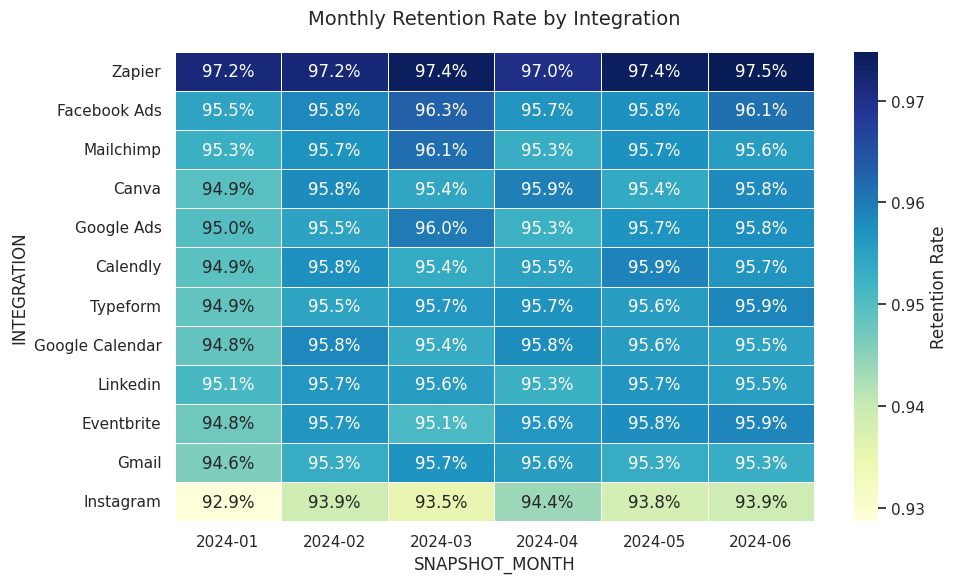

In [138]:
integration_monthly_retention = metadata_integration_data_filtered.groupby(['SNAPSHOT_MONTH', 'INTEGRATION']).agg({'MARKETING_HUB_MRR': 'sum',
    'MARKETING_HUB_MRR_CANCELED': 'sum',
    'SALES_HUB_MRR': 'sum',
    'SALES_HUB_MRR_CANCELED': 'sum'
}).reset_index()

# Calculating overall MRR and MRR_CANCELED for each month and integration
integration_monthly_retention['TOTAL_MRR'] = (
    integration_monthly_retention['MARKETING_HUB_MRR'] + integration_monthly_retention['SALES_HUB_MRR']
)
integration_monthly_retention['TOTAL_MRR_CANCELED'] = (
    integration_monthly_retention['MARKETING_HUB_MRR_CANCELED'] + integration_monthly_retention['SALES_HUB_MRR_CANCELED']
)

integration_monthly_retention['RETENTION_RATE'] = (
    1 - (integration_monthly_retention['TOTAL_MRR_CANCELED'] / integration_monthly_retention['TOTAL_MRR'])
)

average_retention = integration_monthly_retention.groupby('INTEGRATION')['RETENTION_RATE'].mean().reset_index()

average_retention = average_retention.sort_values('RETENTION_RATE', ascending=False)

heatmap_data = integration_monthly_retention.pivot(index='INTEGRATION', columns='SNAPSHOT_MONTH', values='RETENTION_RATE')

heatmap_data = heatmap_data.loc[average_retention['INTEGRATION']]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1%", linewidths=0.5, cbar_kws={'label': 'Retention Rate'})
plt.title("Monthly Retention Rate by Integration", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

**5.Retention Monthly - Marketing Hub**

---



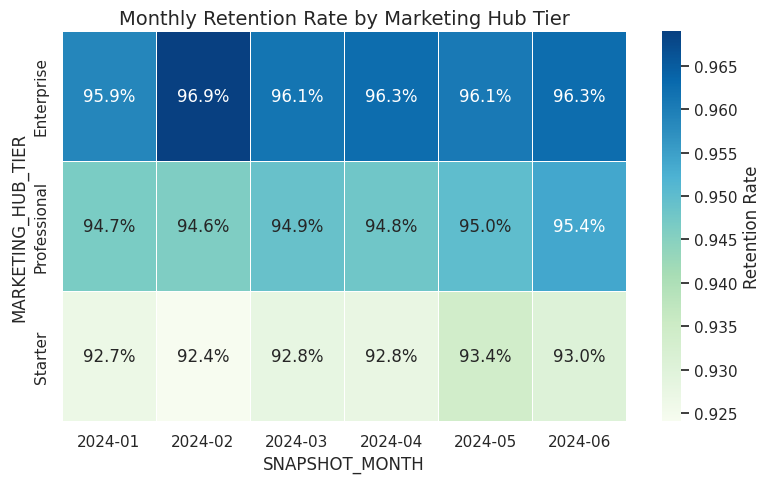

In [139]:
filtered_data = metadata_integration_data_filtered[metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data']

tier_monthly_retention = filtered_data.groupby(['SNAPSHOT_MONTH', 'MARKETING_HUB_TIER']).agg({
    'MARKETING_HUB_MRR': 'sum',
    'MARKETING_HUB_MRR_CANCELED': 'sum'
}).reset_index()

# Calculating retention rate for each month and tier
tier_monthly_retention['RETENTION_RATE'] = (
    1 - (tier_monthly_retention['MARKETING_HUB_MRR_CANCELED'] / tier_monthly_retention['MARKETING_HUB_MRR'])
)
# Calculating average retention rate for each tier
average_retention = tier_monthly_retention.groupby('MARKETING_HUB_TIER')['RETENTION_RATE'].mean().reset_index()

average_retention = average_retention.sort_values('RETENTION_RATE', ascending=False)

# Pivot data for heatmap (SNAPSHOT_MONTH vs MARKETING_HUB_TIER)
heatmap_data = tier_monthly_retention.pivot(index='MARKETING_HUB_TIER', columns='SNAPSHOT_MONTH', values='RETENTION_RATE')

heatmap_data = heatmap_data.loc[average_retention['MARKETING_HUB_TIER']]

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="GnBu", fmt=".1%", linewidths=0.5, cbar_kws={'label': 'Retention Rate'})

plt.title("Monthly Retention Rate by Marketing Hub Tier", fontsize=14, pad=5)
plt.tight_layout()
plt.show()

**6.Retention Annual - Marketing Hub**

---



In [140]:
filtered_data = metadata_integration_data_filtered[metadata_integration_data_filtered['MARKETING_HUB_TIER'] != 'No Data']

# Group and calculate retention rate
marketing_tier_retention = filtered_data.groupby('MARKETING_HUB_TIER').agg({
    'MARKETING_HUB_MRR': 'sum',
    'MARKETING_HUB_MRR_CANCELED': 'sum'
}).reset_index()

marketing_tier_retention['RETENTION_RATE'] = ((1 - (marketing_tier_retention['MARKETING_HUB_MRR_CANCELED'] /
                                                     marketing_tier_retention['MARKETING_HUB_MRR'])) ** 12) * 100

# Format as percentage
marketing_tier_retention['RETENTION_RATE'] = marketing_tier_retention['RETENTION_RATE'].map('{:.2f}%'.format)

print(marketing_tier_retention[['MARKETING_HUB_TIER', 'RETENTION_RATE']])


  MARKETING_HUB_TIER RETENTION_RATE
0         Enterprise         63.16%
1       Professional         53.34%
2            Starter         41.08%


In [141]:
# Filter out 'No Data' tier
filtered_data = metadata_integration_data_filtered[metadata_integration_data_filtered['SALES_HUB_TIER'] != 'No Data']

# Grouping by month and tier
tier_monthly_retention = filtered_data.groupby(['SNAPSHOT_MONTH', 'SALES_HUB_TIER']).agg({
    'SALES_HUB_MRR': 'sum',
    'SALES_HUB_MRR_CANCELED': 'sum'
}).reset_index()

# Calculate retention rate and format as percentage
tier_monthly_retention['RETENTION_RATE'] = (
    (1 - (tier_monthly_retention['SALES_HUB_MRR_CANCELED'] / tier_monthly_retention['SALES_HUB_MRR'])) * 100
).round(2)

# Fill NaN values with 0
tier_monthly_retention['RETENTION_RATE'].fillna(0, inplace=True)

# Print results
print("Monthly Retention Rate by Sales Hub Tier:")
print(tier_monthly_retention[['SNAPSHOT_MONTH', 'SALES_HUB_TIER', 'RETENTION_RATE']])


Monthly Retention Rate by Sales Hub Tier:
   SNAPSHOT_MONTH SALES_HUB_TIER  RETENTION_RATE
0         2024-01     Enterprise           94.21
1         2024-01   Professional           94.26
2         2024-01        Starter           93.02
3         2024-02     Enterprise           95.50
4         2024-02   Professional           94.65
5         2024-02        Starter           93.73
6         2024-03     Enterprise           95.92
7         2024-03   Professional           95.06
8         2024-03        Starter           93.43
9         2024-04     Enterprise           95.91
10        2024-04   Professional           94.28
11        2024-04        Starter           93.68
12        2024-05     Enterprise           96.01
13        2024-05   Professional           94.35
14        2024-05        Starter           91.83
15        2024-06     Enterprise           95.55
16        2024-06   Professional           94.55
17        2024-06        Starter           93.40


<ipython-input-141-9a40050a1f1e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tier_monthly_retention['RETENTION_RATE'].fillna(0, inplace=True)


## **4.5 Net New ARR**

**1. NNARR For Marketing Hub (MRR - Cancelled)**

---



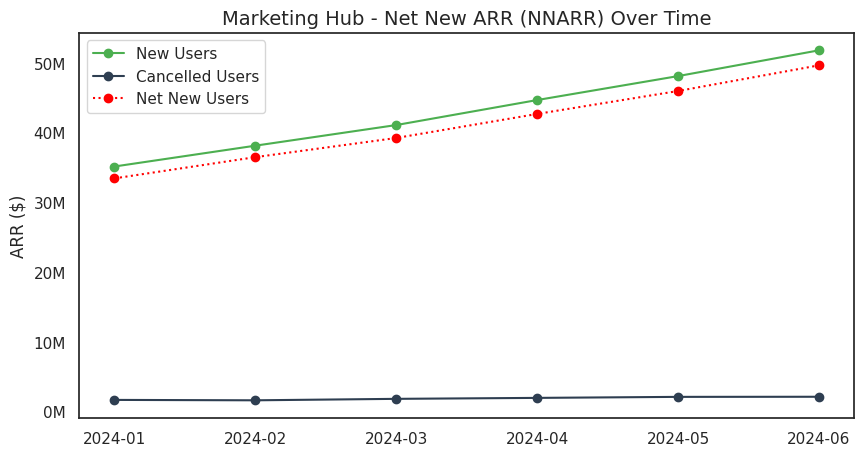

  SNAPSHOT_MONTH      New_ARR  Cancellation_ARR        NNARR
0        2024-01  35175423.58        1702670.20  33472753.38
1        2024-02  38162461.04        1645399.03  36517062.01
2        2024-03  41121378.54        1854657.95  39266720.59
3        2024-04  44706812.53        1992632.69  42714179.84
4        2024-05  48142307.69        2138137.13  46004170.56
5        2024-06  51838860.03        2153759.25  49685100.78


In [142]:
monthly_data = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH').agg({
    'MARKETING_HUB_MRR': 'sum',
    'MARKETING_HUB_MRR_CANCELED': 'sum',
}).reset_index()

monthly_data['New_ARR'] = monthly_data['MARKETING_HUB_MRR']
monthly_data['Cancellation_ARR'] = monthly_data['MARKETING_HUB_MRR_CANCELED']

# Calculate Net New ARR (New ARR - Cancellation ARR)
monthly_data['NNARR'] = monthly_data['New_ARR'] - monthly_data['Cancellation_ARR']

plt.figure(figsize=(10, 5))

plt.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['New_ARR'], marker='o', linestyle='-', color='#4caf50', label='New Users')
plt.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Cancellation_ARR'], marker='o', linestyle='-', color='#2e3e51', label='Cancelled Users')
plt.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['NNARR'], marker='o', linestyle=':', color='red', label='Net New Users')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.title('Marketing Hub - Net New ARR (NNARR) Over Time', fontsize=14)
plt.ylabel('ARR ($)', fontsize=12)
plt.legend(loc='upper left')

plt.show()

print(monthly_data[['SNAPSHOT_MONTH', 'New_ARR', 'Cancellation_ARR', 'NNARR']])


**2. NNARR For Sales Hub (MRR - Cancelled)**

---



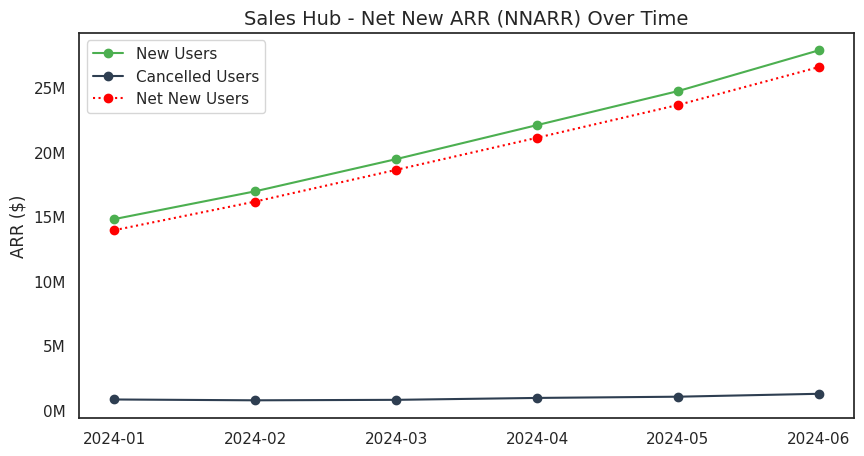

  SNAPSHOT_MONTH      New_ARR  Cancellation_ARR        NNARR
0        2024-01  14821858.93         858134.64  13963724.29
1        2024-02  16973995.54         794017.03  16179978.51
2        2024-03  19463570.15         830212.55  18633357.60
3        2024-04  22097543.29         977964.50  21119578.79
4        2024-05  24728945.79        1073117.15  23655828.64
5        2024-06  27887407.84        1298371.46  26589036.38


In [143]:
monthly_data = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH').agg({
    'SALES_HUB_MRR': 'sum',
    'SALES_HUB_MRR_CANCELED': 'sum',
}).reset_index()

monthly_data['New_ARR'] = monthly_data['SALES_HUB_MRR']
monthly_data['Cancellation_ARR'] = monthly_data['SALES_HUB_MRR_CANCELED']

# Calculate Net New ARR (New ARR - Cancellation ARR)
monthly_data['NNARR'] = monthly_data['New_ARR'] - monthly_data['Cancellation_ARR']

plt.figure(figsize=(10, 5))

plt.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['New_ARR'], marker='o', linestyle='-', color='#4caf50', label='New Users')
plt.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['Cancellation_ARR'], marker='o', linestyle='-', color='#2e3e51', label='Cancelled Users')
plt.plot(monthly_data['SNAPSHOT_MONTH'], monthly_data['NNARR'], marker='o', linestyle=':', color='red', label='Net New Users')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.title('Sales Hub - Net New ARR (NNARR) Over Time', fontsize=14)
plt.ylabel('ARR ($)', fontsize=12)
plt.legend(loc='upper left')

plt.show()

print(monthly_data[['SNAPSHOT_MONTH', 'New_ARR', 'Cancellation_ARR', 'NNARR']])


# 5. Churn Rate and CLV Analysis

**1. Annual Churn Rate**

---



In [144]:
# Calculate Annual Retention Rates
marketing_starting_value = metadata_integration_data_filtered['MARKETING_HUB_MRR'].sum()
marketing_lost_value = metadata_integration_data_filtered['MARKETING_HUB_MRR_CANCELED'].sum()
marketing_customer_dollar_retention = (1 - (marketing_lost_value / marketing_starting_value)) ** 12
print("Marketing Hub:")
print(f"Annual Retention: {marketing_customer_dollar_retention:.2%}")
print(f"Annual Churn Rate: {1 - marketing_customer_dollar_retention:.2%}\n")

sales_starting_value = metadata_integration_data_filtered['SALES_HUB_MRR'].sum()
sales_lost_value = metadata_integration_data_filtered['SALES_HUB_MRR_CANCELED'].sum()
sales_customer_dollar_retention = (1 - (sales_lost_value / sales_starting_value)) ** 12
print("Sales Hub:")
print(f"Annual Retention: {sales_customer_dollar_retention:.2%}")
print(f"Annual Churn Rate: {1 - sales_customer_dollar_retention:.2%}\n")

overall_starting_value = metadata_integration_data_filtered['SALES_HUB_MRR'].sum() + metadata_integration_data_filtered['MARKETING_HUB_MRR'].sum()
overall_lost_value = metadata_integration_data_filtered['SALES_HUB_MRR_CANCELED'].sum() + metadata_integration_data_filtered['MARKETING_HUB_MRR_CANCELED'].sum()
overall_customer_dollar_retention = (1 - (overall_lost_value / overall_starting_value)) ** 12
print("Overall Hub:")
print(f"Annual Retention: {overall_customer_dollar_retention:.2%}")
print(f"Annual Churn Rate: {1 - overall_customer_dollar_retention:.2%}\n")

Marketing Hub:
Annual Retention: 58.04%
Annual Churn Rate: 41.96%

Sales Hub:
Annual Retention: 56.62%
Annual Churn Rate: 43.38%

Overall Hub:
Annual Retention: 57.57%
Annual Churn Rate: 42.43%



**2. KPIs -  ARPU, Churn Rate, CLV**

---



In [145]:
monthly_revenue = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR', 'SALES_HUB_MRR']].sum()
total_customers_per_month = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')['CUSTOMER_ID'].nunique()

# Calculating ARPU
arpu_marketing = (monthly_revenue['MARKETING_HUB_MRR'] / total_customers_per_month).round(1)
arpu_sales = (monthly_revenue['SALES_HUB_MRR'] / total_customers_per_month).round(1)

# Calculating Churn Rate
cancelled_customers = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR_CANCELED', 'SALES_HUB_MRR_CANCELED']].sum()

churn_rate_marketing = (cancelled_customers['MARKETING_HUB_MRR_CANCELED'] / monthly_revenue['MARKETING_HUB_MRR']).round(3)
churn_rate_sales = (cancelled_customers['SALES_HUB_MRR_CANCELED'] / monthly_revenue['SALES_HUB_MRR']).round(3)

# Formatting Churn Rate
churn_rate_marketing_percent = churn_rate_marketing.apply(lambda x: f"{x*100:.1f}%" if pd.notna(x) else "-")
churn_rate_sales_percent = churn_rate_sales.apply(lambda x: f"{x*100:.1f}%" if pd.notna(x) else "-")

# Calculating CLV
clv_marketing = (arpu_marketing / churn_rate_marketing).round(1)
clv_sales = (arpu_sales / churn_rate_sales).round(1)

monthly_clv = pd.DataFrame({
    'Marketing_ARPU': arpu_marketing,
    'Marketing_Churn_Rate': churn_rate_marketing_percent,
    'Marketing_CLV': clv_marketing,
    'Sales_ARPU': arpu_sales,
    'Sales_Churn_Rate': churn_rate_sales_percent,
    'Sales_CLV': clv_sales
})

print(monthly_clv)


                Marketing_ARPU Marketing_Churn_Rate  Marketing_CLV  Sales_ARPU Sales_Churn_Rate  Sales_CLV
SNAPSHOT_MONTH                                                                                            
2024-01                  910.8                 4.8%        18975.0       383.8             5.8%     6617.2
2024-02                  977.3                 4.3%        22727.9       434.7             4.7%     9248.9
2024-03                 1034.6                 4.5%        22991.1       489.7             4.3%    11388.4
2024-04                 1096.6                 4.5%        24368.9       542.0             4.4%    12318.2
2024-05                 1153.2                 4.4%        26209.1       592.3             4.3%    13774.4
2024-06                 1207.0                 4.2%        28738.1       649.3             4.7%    13814.9


# 6. Predictive Analysis - CLV Prediction

**1. Predictive churn for the next 6 months (ARPU/Churn Rate)**

---



In [146]:
# Prepare the data for ARPU and churn rate for training
monthly_revenue = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR', 'SALES_HUB_MRR']].sum()
total_customers_per_month = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')['CUSTOMER_ID'].nunique()

arpu_marketing = monthly_revenue['MARKETING_HUB_MRR'] / total_customers_per_month
arpu_sales = monthly_revenue['SALES_HUB_MRR'] / total_customers_per_month

# Churn Rate
cancelled_customers = metadata_integration_data_filtered.groupby('SNAPSHOT_MONTH')[['MARKETING_HUB_MRR_CANCELED', 'SALES_HUB_MRR_CANCELED']].sum()
churn_rate_marketing = cancelled_customers['MARKETING_HUB_MRR_CANCELED'] / monthly_revenue['MARKETING_HUB_MRR']
churn_rate_sales = cancelled_customers['SALES_HUB_MRR_CANCELED'] / monthly_revenue['SALES_HUB_MRR']

# Prepare data for linear regression (using months as numerical values)
monthly_revenue['month_num'] = np.arange(len(monthly_revenue))

# Train a model for ARPU (Marketing and Sales)
arpu_model_marketing = LinearRegression()
arpu_model_sales = LinearRegression()

# Train ARPU models
arpu_model_marketing.fit(monthly_revenue['month_num'].values.reshape(-1, 1), arpu_marketing)
arpu_model_sales.fit(monthly_revenue['month_num'].values.reshape(-1, 1), arpu_sales)

# Train a model for churn rate (Marketing and Sales)
churn_model_marketing = LinearRegression()
churn_model_sales = LinearRegression()

# Train churn models
churn_model_marketing.fit(monthly_revenue['month_num'].values.reshape(-1, 1), churn_rate_marketing)
churn_model_sales.fit(monthly_revenue['month_num'].values.reshape(-1, 1), churn_rate_sales)

# Predict ARPU and churn rate for the next 6 months
future_months = np.arange(len(monthly_revenue), len(monthly_revenue) + 6).reshape(-1, 1)

# Predict ARPU for the next 6 months
predicted_arpu_marketing = arpu_model_marketing.predict(future_months)
predicted_arpu_sales = arpu_model_sales.predict(future_months)

# Predict churn rate for the next 6 months
predicted_churn_marketing = churn_model_marketing.predict(future_months)
predicted_churn_sales = churn_model_sales.predict(future_months)

# Calculating predicted CLV
predicted_clv_marketing = predicted_arpu_marketing / predicted_churn_marketing
predicted_clv_sales = predicted_arpu_sales / predicted_churn_sales

# first 6 months of actual data
actual_months = monthly_revenue.index[:6]
actual_arpu_marketing = arpu_marketing[:6]
actual_arpu_sales = arpu_sales[:6]
actual_churn_marketing = churn_rate_marketing[:6]
actual_churn_sales = churn_rate_sales[:6]
actual_clv_marketing = actual_arpu_marketing / actual_churn_marketing
actual_clv_sales = actual_arpu_sales / actual_churn_sales

# Next 6 months' predicted values
predicted_months = pd.date_range(start=monthly_revenue.index[-1], periods=7, freq='MS')[1:]

# Combine both actual and predicted values
actual_data = pd.DataFrame({
    'Month': actual_months,
    'Status': 'Actual',
    'ARPU_Marketing': actual_arpu_marketing.round(1),
    'Churn_Rate_Marketing': (actual_churn_marketing * 100).round(1),
    'CLV_Marketing': actual_clv_marketing.round(1),
    'ARPU_Sales': actual_arpu_sales.round(1),
    'Churn_Rate_Sales': (actual_churn_sales * 100).round(1),
    'CLV_Sales': actual_clv_sales.round(1)
})

predicted_data = pd.DataFrame({
    'Month': predicted_months,
    'Status': 'Pred',
    'ARPU_Marketing': predicted_arpu_marketing.round(1),
    'Churn_Rate_Marketing': (predicted_churn_marketing * 100).round(1),
    'CLV_Marketing': predicted_clv_marketing.round(1),
    'ARPU_Sales': predicted_arpu_sales.round(1),
    'Churn_Rate_Sales': (predicted_churn_sales * 100).round(1),
    'CLV_Sales': predicted_clv_sales.round(1)

})

# Combine actual & predicted data
combined_data = pd.concat([actual_data, predicted_data], ignore_index=True)
combined_data['Month'] = pd.to_datetime(combined_data['Month']).dt.strftime('%Y-%m')

print(combined_data)


      Month  Status  ARPU_Marketing  Churn_Rate_Marketing  CLV_Marketing  ARPU_Sales  Churn_Rate_Sales  CLV_Sales
0   2024-01  Actual           910.8                   4.8        18816.4       383.8               5.8     6628.8
1   2024-02  Actual           977.3                   4.3        22666.9       434.7               4.7     9292.4
2   2024-03  Actual          1034.6                   4.5        22939.8       489.7               4.3    11480.8
3   2024-04  Actual          1096.6                   4.5        24603.1       542.0               4.4    12247.1
4   2024-05  Actual          1153.2                   4.4        25964.7       592.3               4.3    13649.9
5   2024-06  Actual          1207.0                   4.2        29052.3       649.3               4.7    13947.1
6   2024-07    Pred          1270.3                   4.1        30660.0       700.6               4.0    17342.5
7   2024-08    Pred          1329.5                   4.1        32787.2       753.6    

**2. CLV Prediction - Marketing & Sales**

---



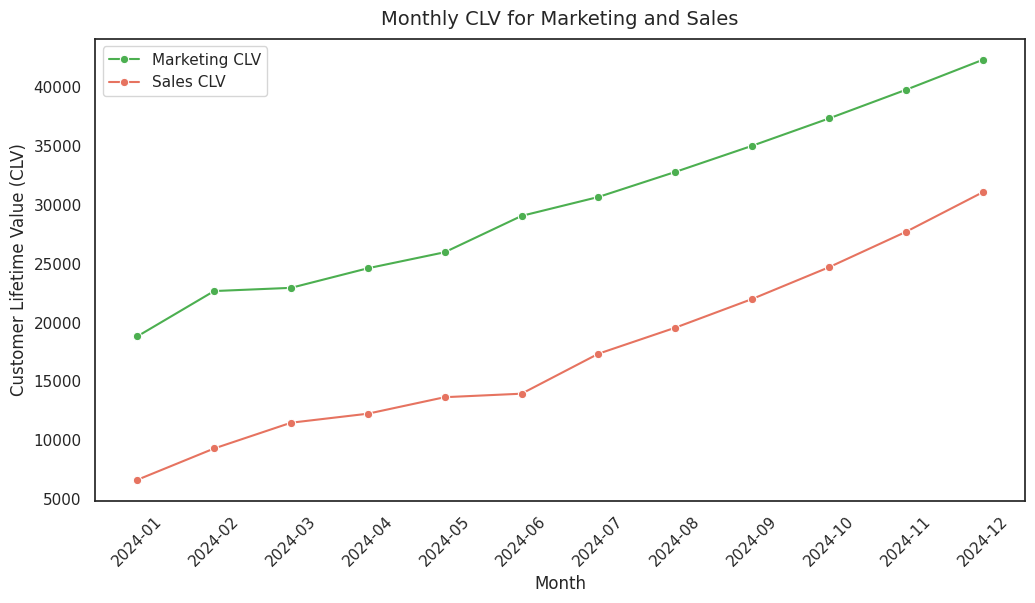

In [147]:
sns.set(style="white")
plt.figure(figsize=(12, 6))

# Plot Marketing Hub CLV
sns.lineplot(data=combined_data, x='Month', y='CLV_Marketing', marker='o', label='Marketing CLV', color='#4caf50')

# Plot Sales Hub CLV
sns.lineplot(data=combined_data, x='Month', y='CLV_Sales', marker='o', label='Sales CLV', color='#e67360ff')

plt.ylabel('Customer Lifetime Value (CLV)', fontsize=12)
plt.title("Monthly CLV for Marketing and Sales", fontsize=14, pad=10)

plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.show()

# 7. Saving Dataset

In [148]:
metadata_integration_data.to_csv('final_dataset_customer_metadata_integration.csv', index=False)